In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,
    confusion_matrix, roc_curve
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [10]:
df = pd.read_csv("D:\masaüstüyedek\makina\DDos.csv")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Hakan Demir\AppData\Local\Temp\ipykernel_5452\138002312.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\masaüstüyedek\makina\DDos.csv")
C:\Users\Hakan Demir\AppData\Local\Temp\ipykernel_5452\138002312.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\masaüstüyedek\makina\DDos.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\masaüstüyedek\\makina\\DDos.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [ ]:
unique_labels = df['label'].unique()
for i in unique_labels:
  print(i)

0
1


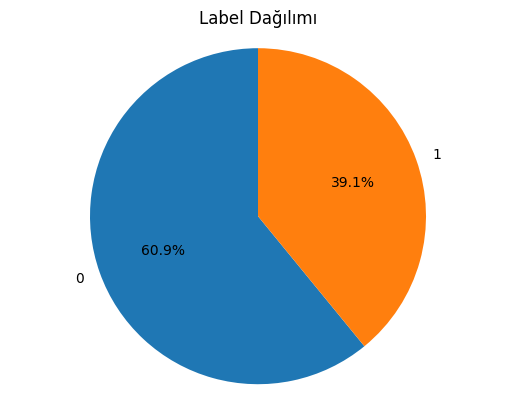

In [ ]:
# Labels sütununun değerine göre sayıları
label_counts = df["label"].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Label Dağılımı")
plt.show()

In [ ]:
for col in ['src', 'dst', 'Protocol']:
    print(f"--- {col} ---")
    print(df[col].unique())
    print(f"Toplam farklı değer sayısı: {df[col].nunique()}\n")


--- src ---
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']
Toplam farklı değer sayısı: 19

--- dst ---
['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']
Toplam farklı değer sayısı: 18

--- Protocol ---
['UDP' 'TCP' 'ICMP']
Toplam farklı değer sayısı: 3



In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ['src', 'dst', 'Protocol']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

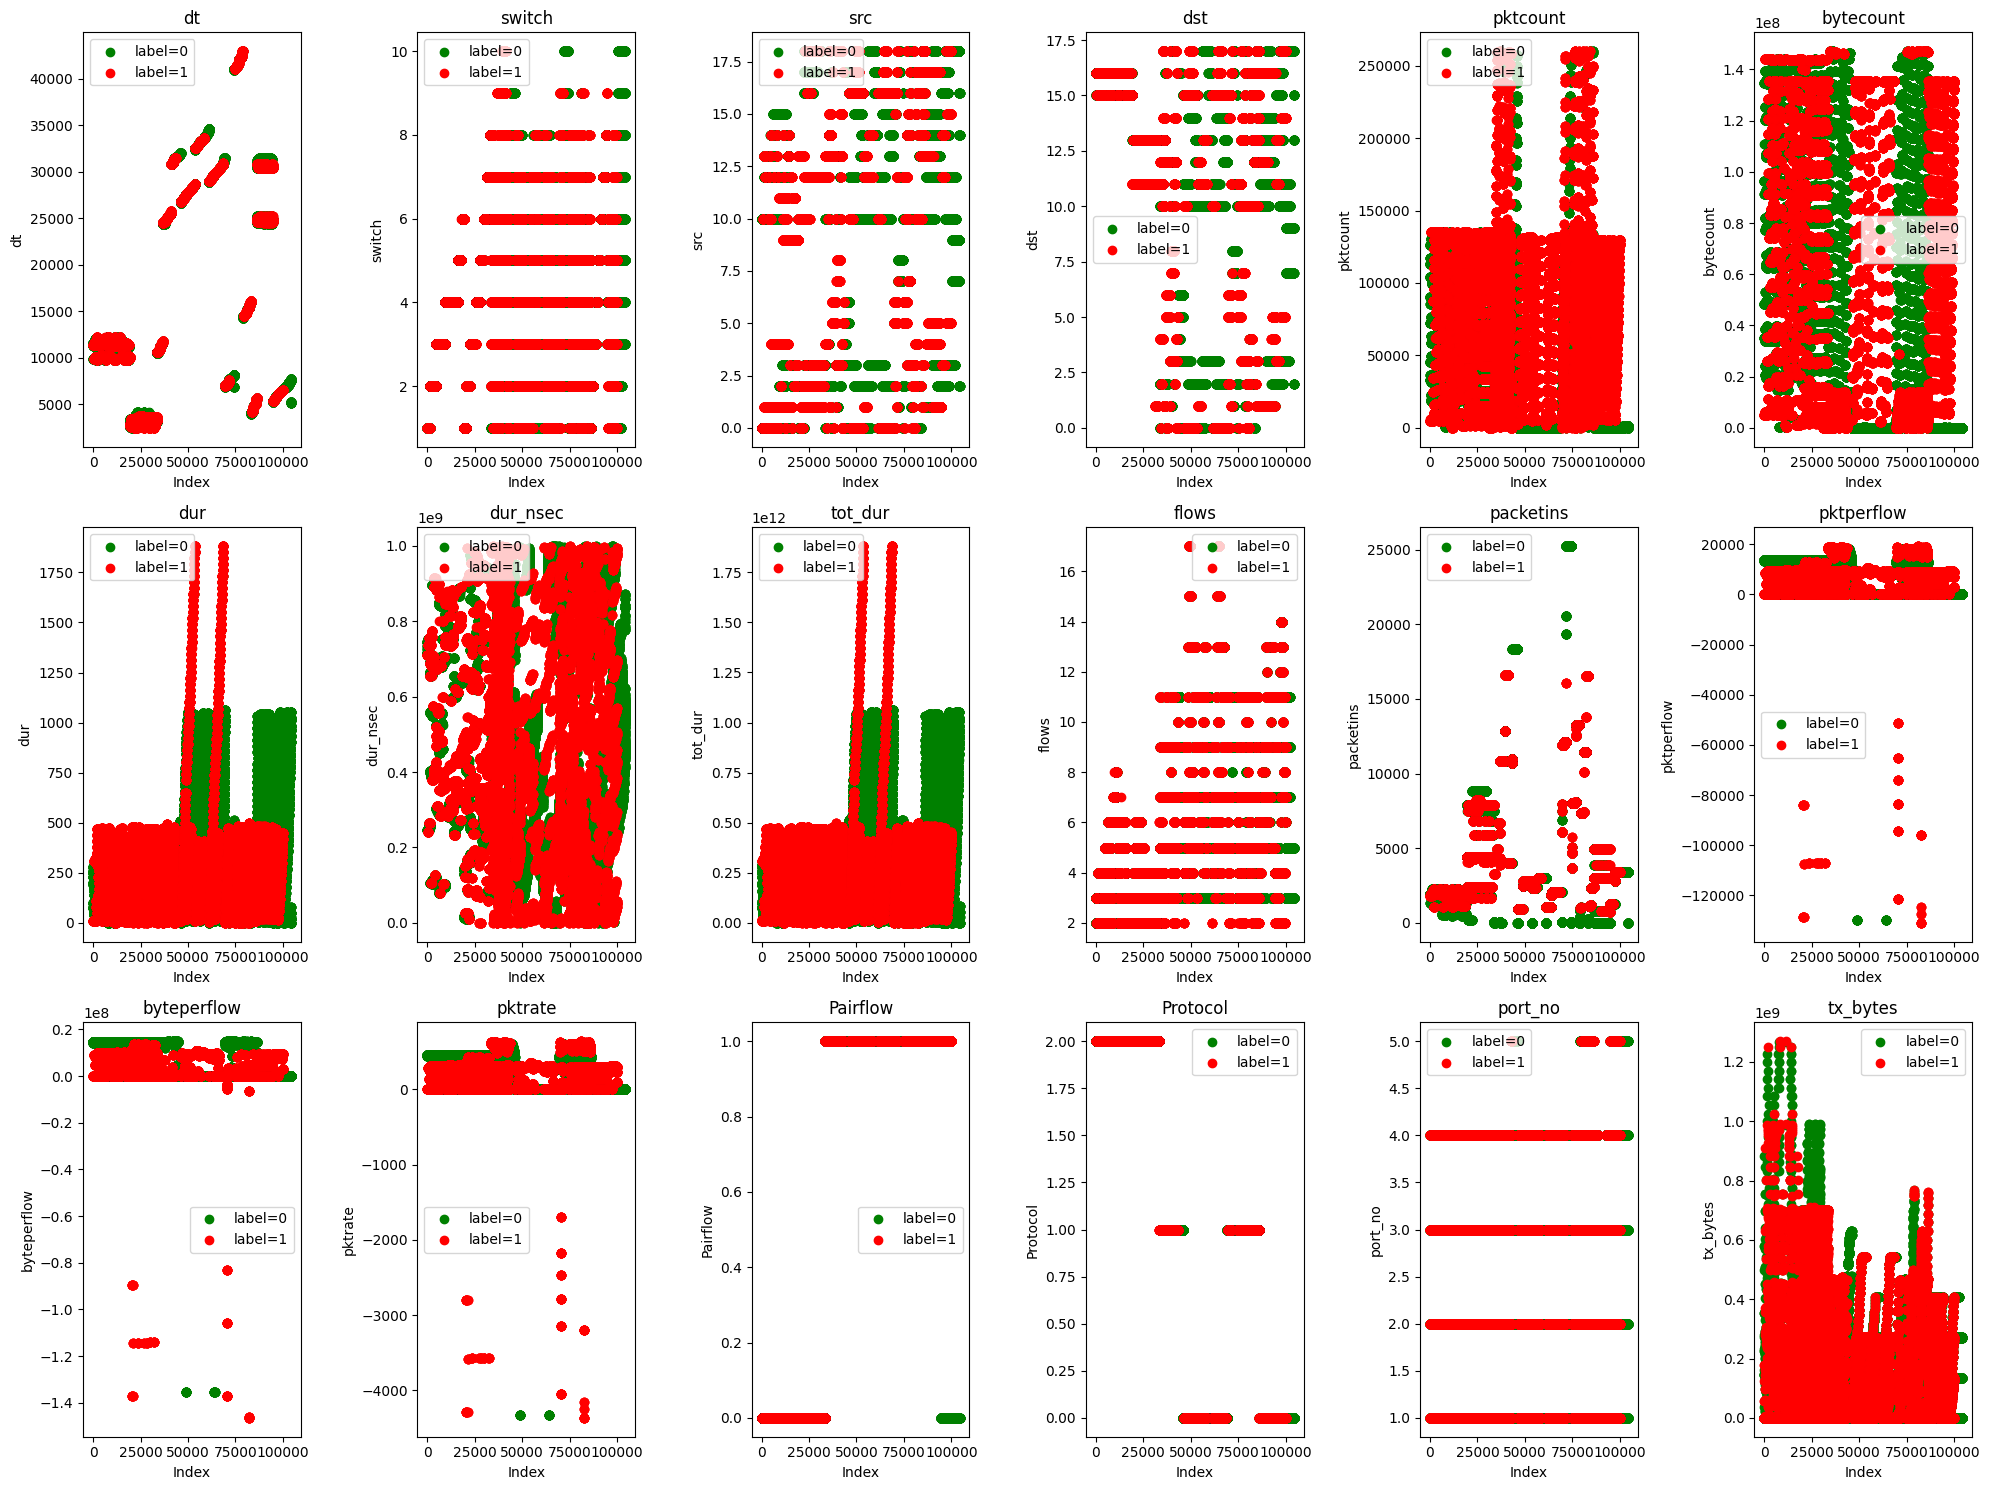

In [ ]:
plt.figure(figsize=(20, 15))  # Grafik boyutunu ayarla

# Her sütun için scatter plot çizimi
for i, column in enumerate(df.columns[:18]):  # Sadece ilk 18 sütunu kullan
    if column != 'label':  # 'Label' sütununu atla
        plt.subplot(3, 6, i+1)  # Grafikleri 3x6'lık bir tabloda yerleştir
        for label_value, color in zip([0, 1], ['green', 'red']):
            plt.scatter(df.index[df['label'] == label_value], df.loc[df['label'] == label_value, column], color=color, label=f'label={label_value}')
        plt.title(f'{column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()

plt.tight_layout()  # Grafikler arasındaki boşluğu ayarla
plt.show()

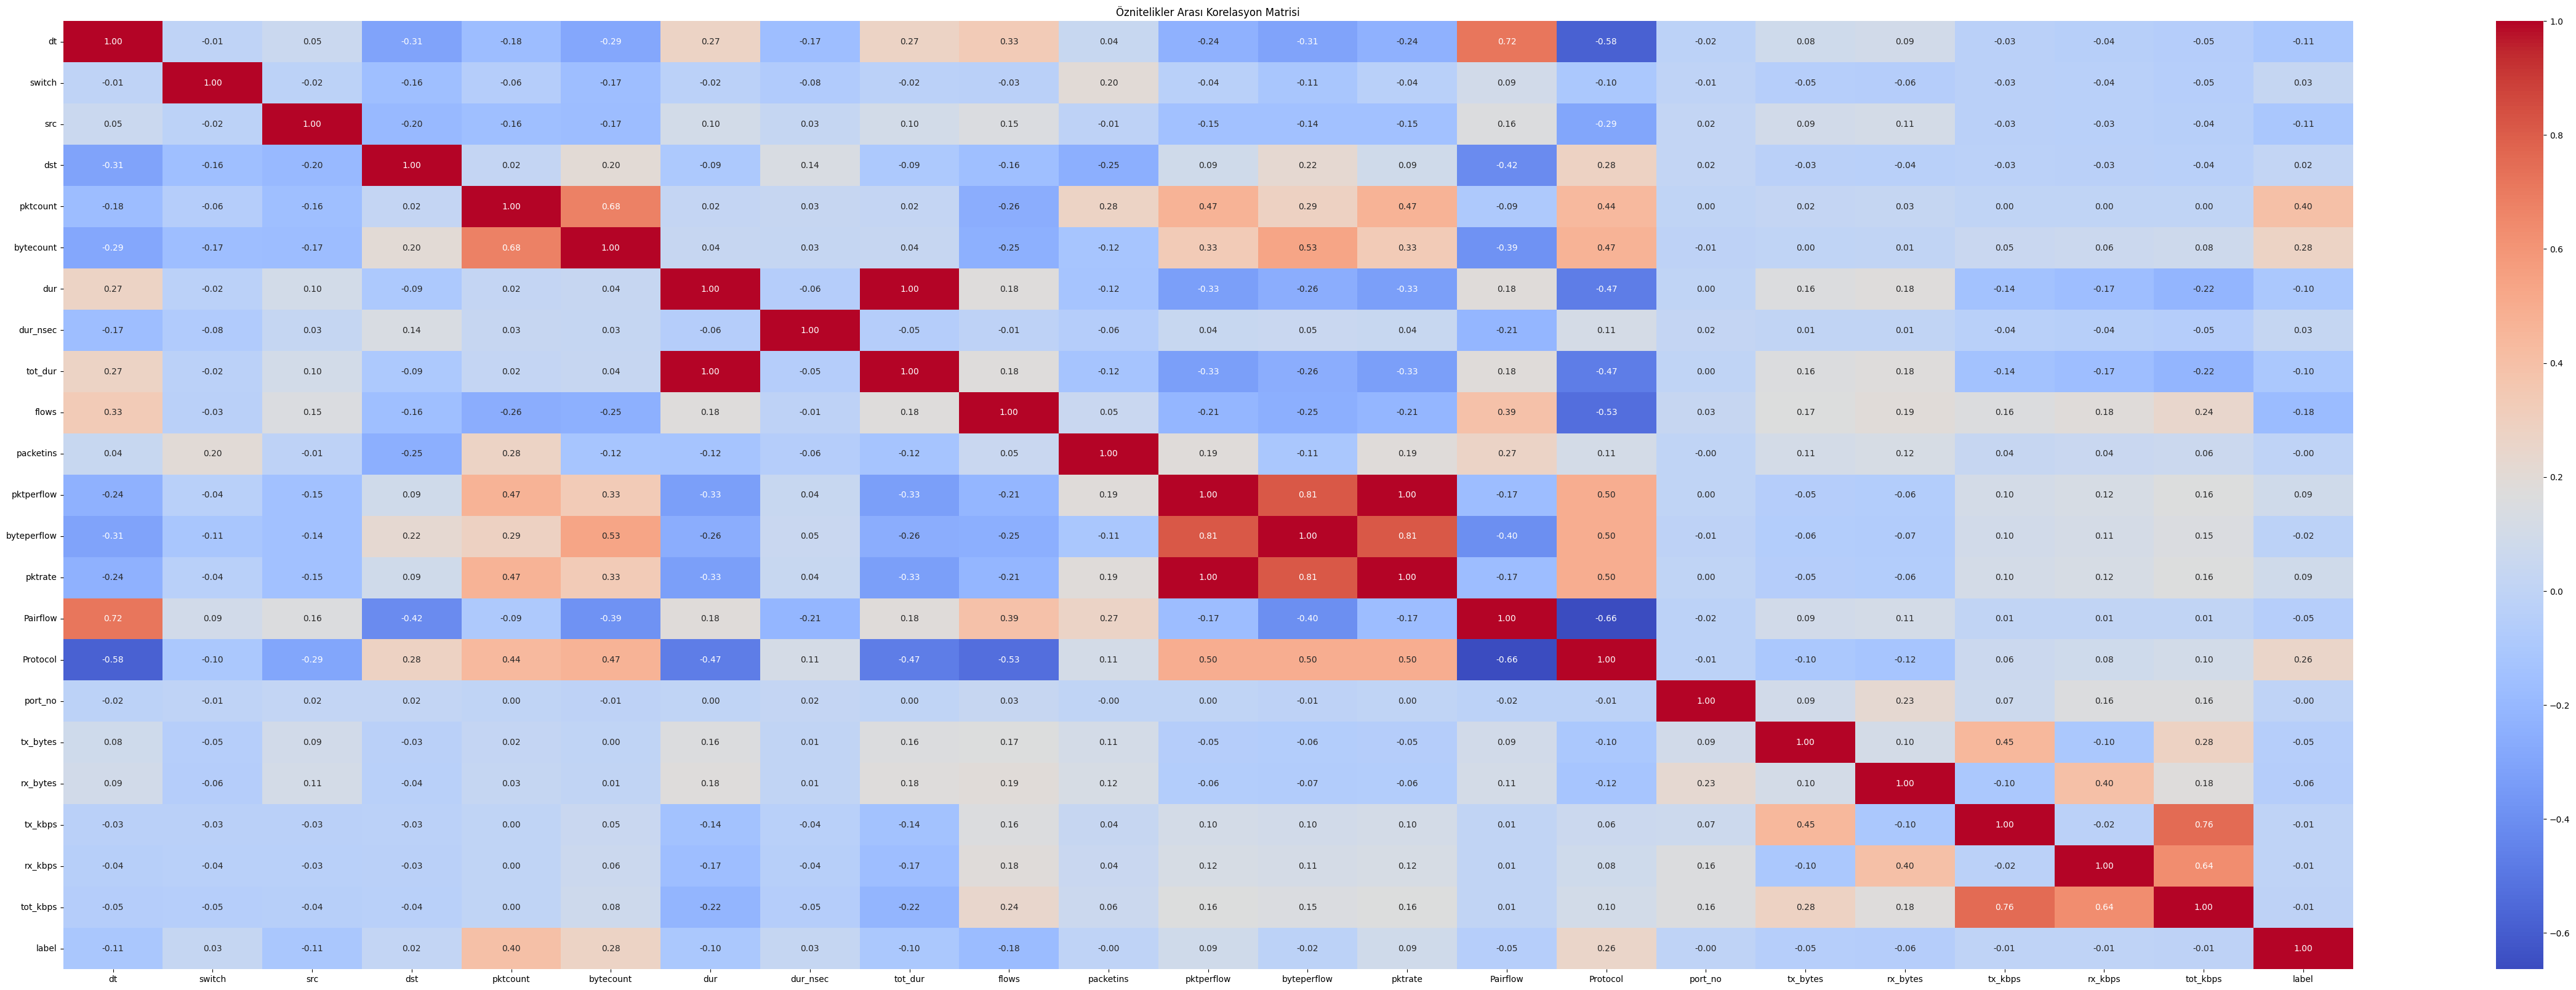

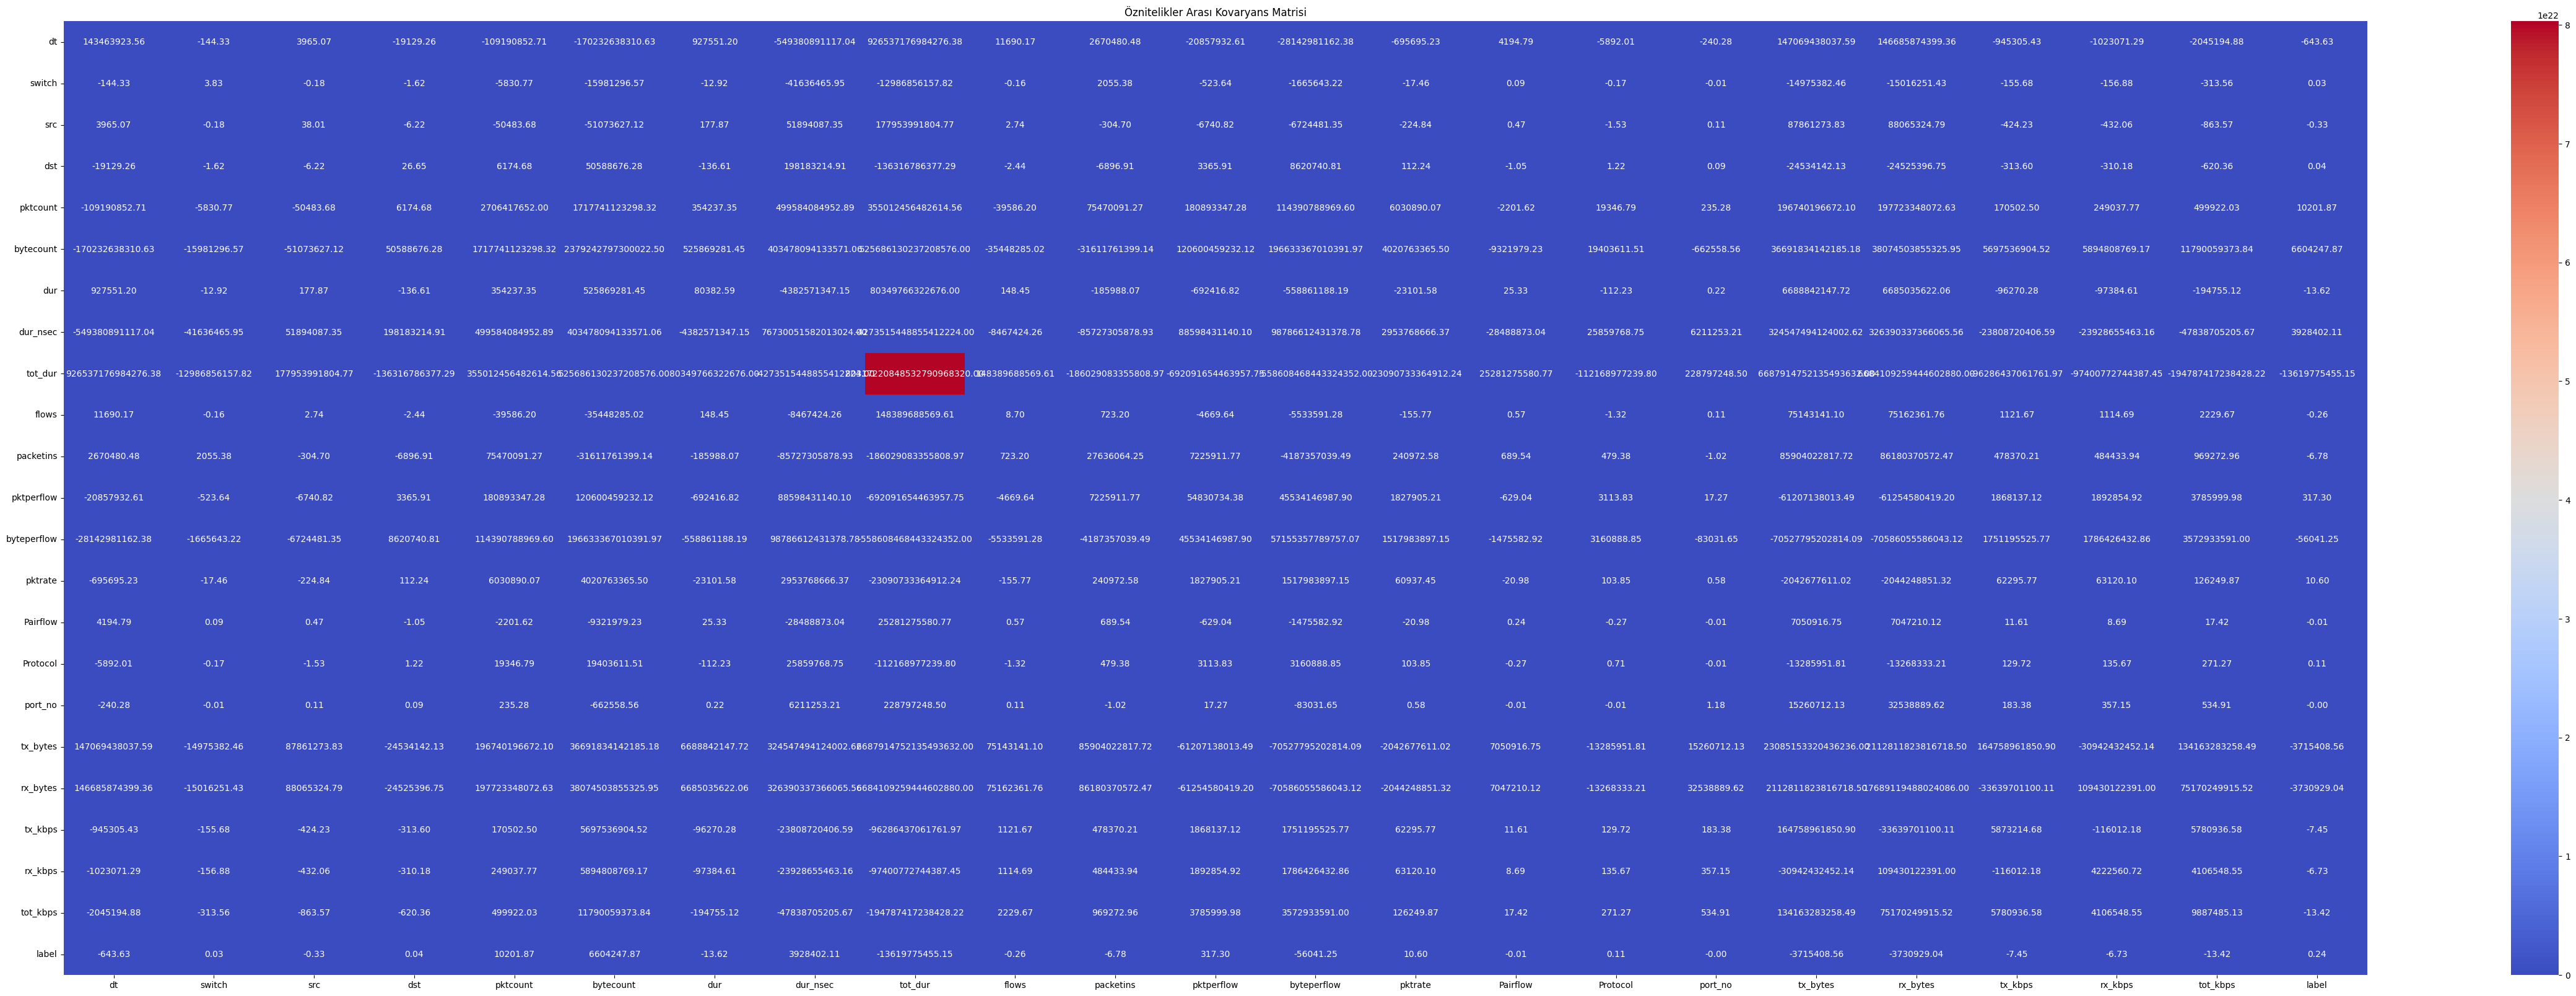

In [ ]:
# Korelasyon matrisini hesaplayın
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Öznitelikler Arası Korelasyon Matrisi")
plt.show()

# Kovaryans matrisini hesaplayın
covariance_matrix = df.cov()

# Kovaryans matrisini görselleştirin
plt.figure(figsize=(60, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Öznitelikler Arası Kovaryans Matrisi")
plt.show()

# **Öznitelik seçimi**

In [ ]:
#özellik seçimi
# Hedef değişkenle korelasyonu al (label)
corr_with_target = correlation_matrix['label'].abs().sort_values(ascending=False)

# Yüksek korelasyonlu değişkenlerin seçimi (> 0.05)
relevant_features = corr_with_target[corr_with_target > 0.05].index.tolist()
relevant_features.remove('label')

# Yeni veri seti
df_selected = df[relevant_features + ['label']]

In [ ]:
print(df_selected.head(5))

   pktcount  bytecount  Protocol  flows  src     dt       tot_dur  dur  \
0     45304   48294064         2      3    0  11425  1.010000e+11  100   
1    126395  134737070         2      2    0  11605  2.810000e+11  280   
2     90333   96294978         2      3   10  11425  2.010000e+11  200   
3     90333   96294978         2      3   10  11425  2.010000e+11  200   
4     90333   96294978         2      3   10  11425  2.010000e+11  200   

   pktrate  pktperflow  rx_bytes   tx_bytes  label  
0      451       13535      3917  143928631      0  
1      451       13531      3520       3842      0  
2      451       13534      1242       3795      0  
3      451       13534      1492       3688      0  
4      451       13534      3665       3413      0  


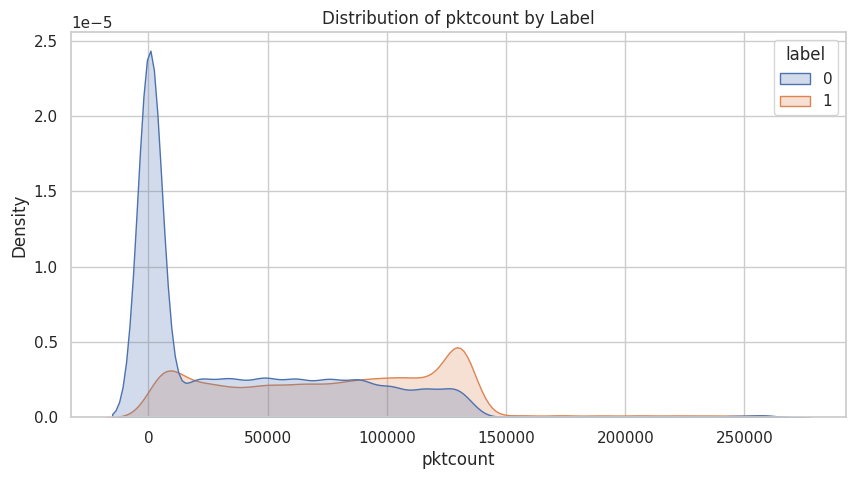

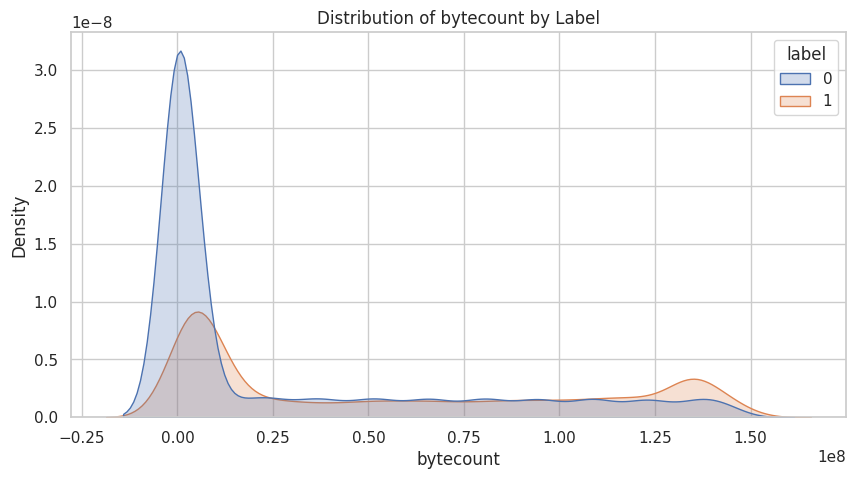

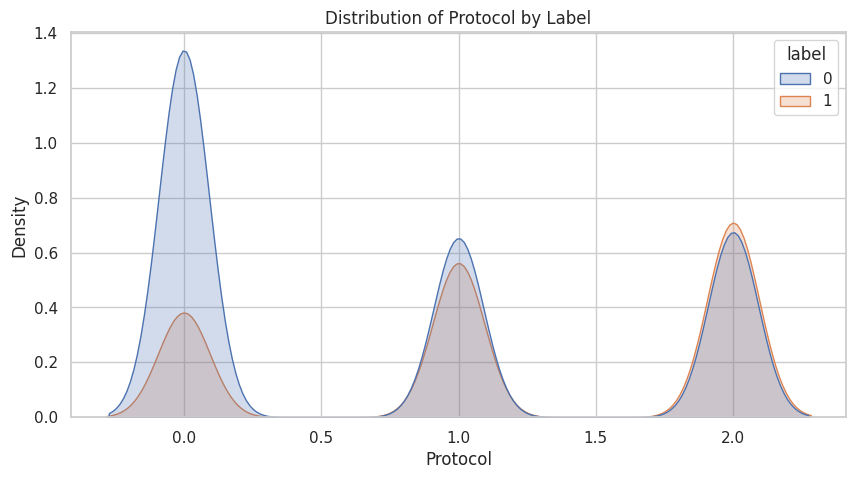

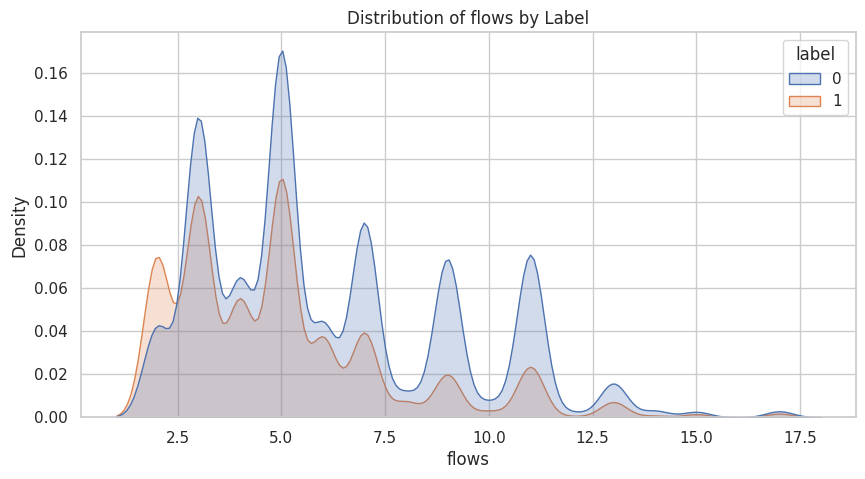

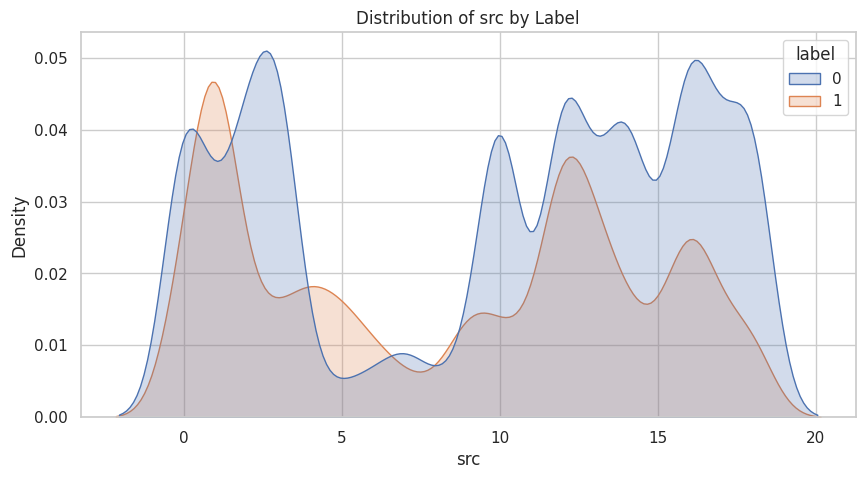

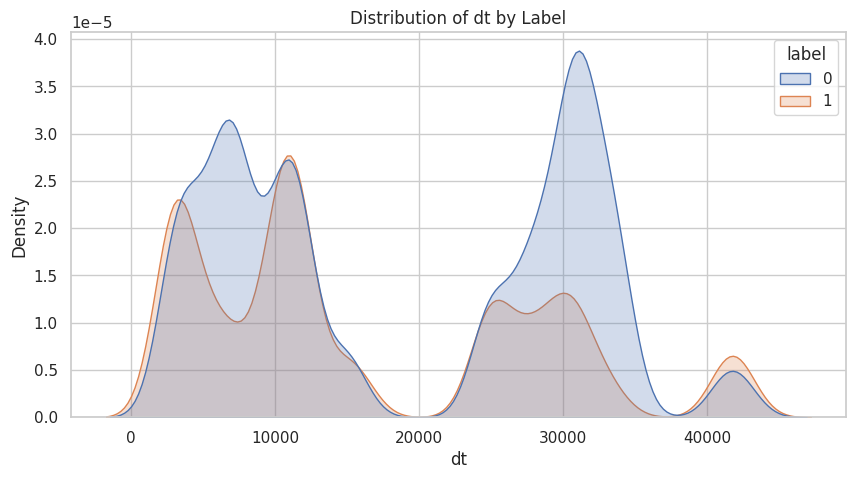

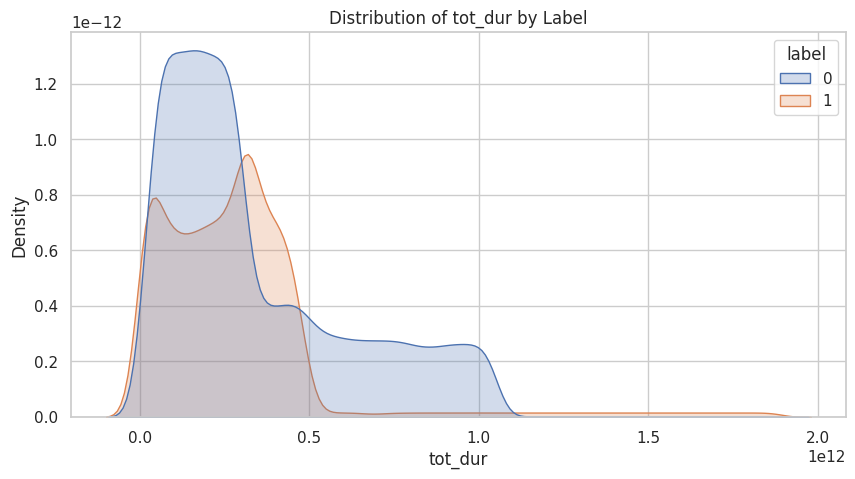

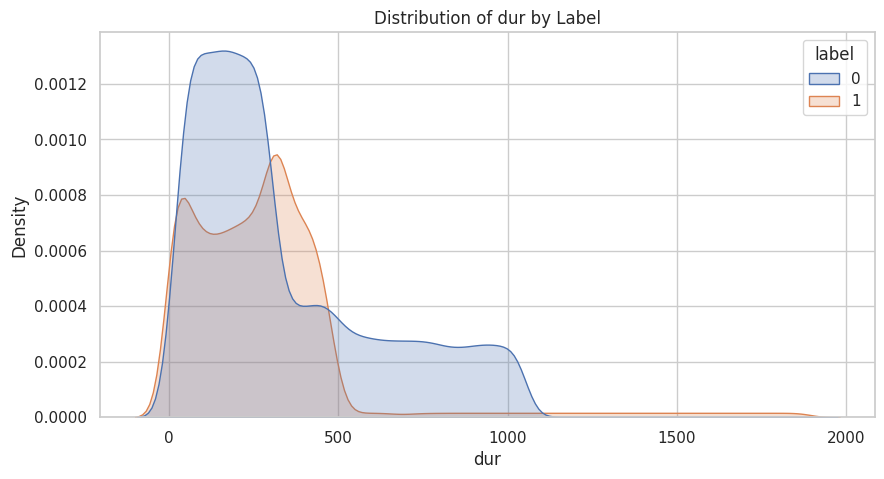

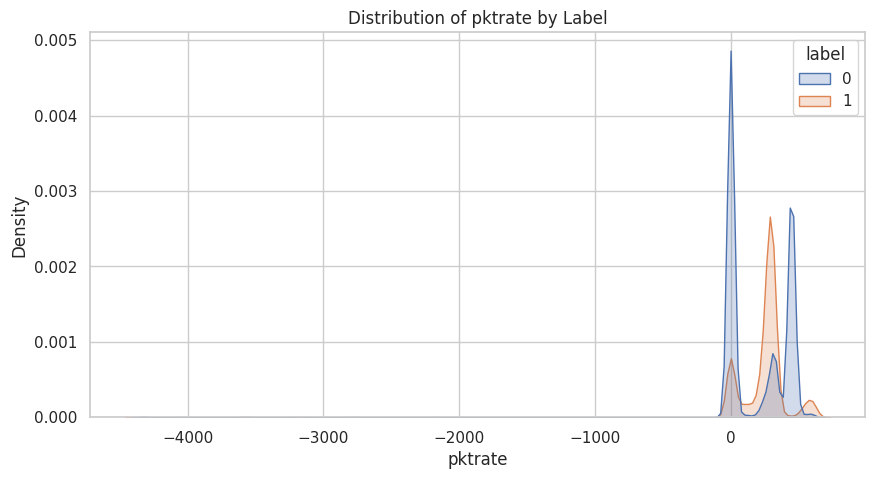

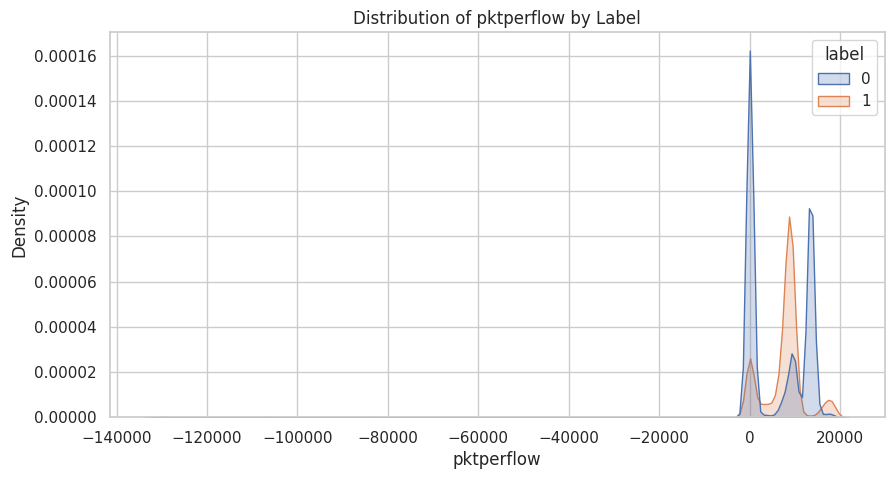

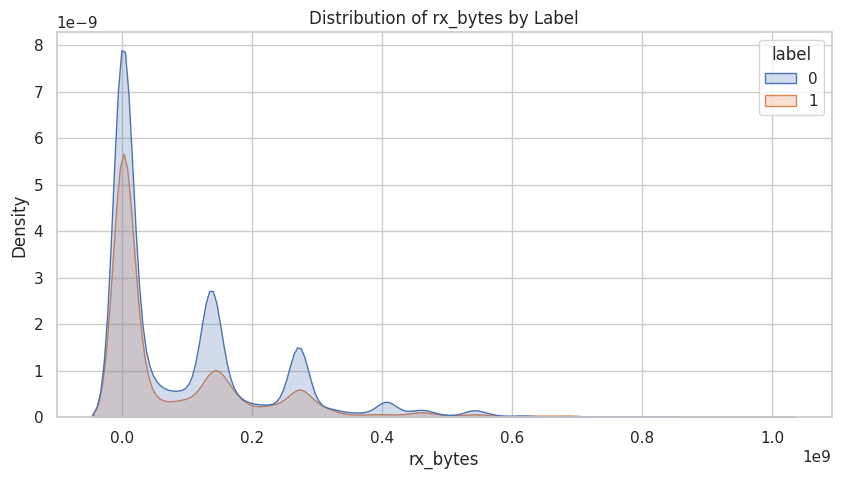

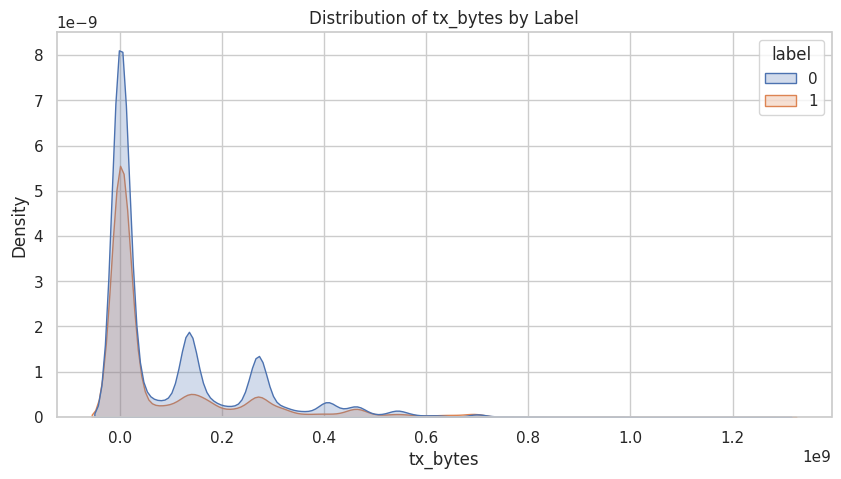

In [ ]:
# Özellik dağılımını görselleştir
sns.set(style="whitegrid")
for feature in relevant_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df_selected, x=feature, hue="label", fill=True)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()


In [4]:
# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected.drop('label', axis=1))
y = df_selected['label'].values

NameError: name 'df_selected' is not defined

In [ ]:
def custom_cross_val_roc(model, X_scaled, y, cv=10):
    metrics = {'Accuracy': [], 'F1 Score': [], 'Recall': [], 'Precision': []}
    roc_curves = []
    confusion_matrices = []

    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    for train_index, test_index in skf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['F1 Score'].append(f1_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))

        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            raise AttributeError("Model has no predict_proba or decision_function")

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_curves.append((fpr, tpr))

        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    return metrics, roc_curves, confusion_matrices


In [ ]:
# Modelleri tanımla
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}


Evaluating KNN...
Accuracy: 0.9808 ± 0.0014
F1 Score: 0.9754 ± 0.0018
Recall: 0.9738 ± 0.0020
Precision: 0.9770 ± 0.0026


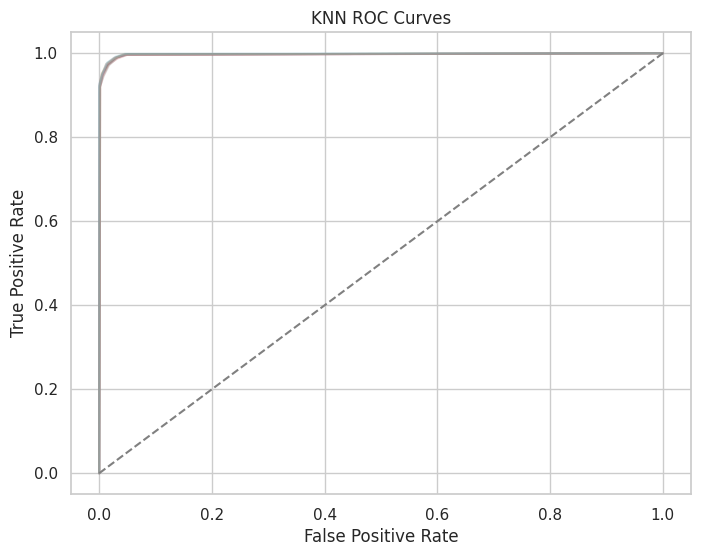

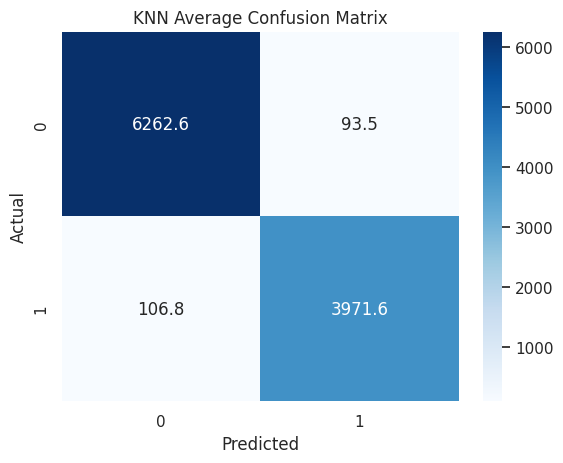


Evaluating Naive Bayes...
Accuracy: 0.6196 ± 0.0034
F1 Score: 0.5317 ± 0.0043
Recall: 0.5525 ± 0.0062
Precision: 0.5125 ± 0.0040


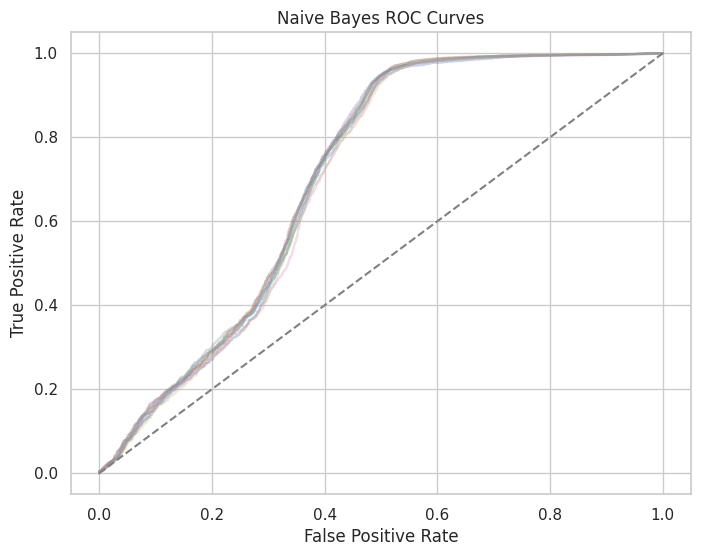

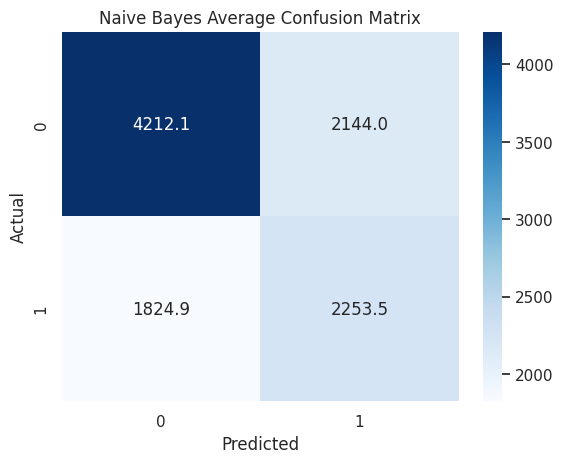


Evaluating Linear SVM...
Accuracy: 0.7151 ± 0.0027
F1 Score: 0.5915 ± 0.0047
Recall: 0.5278 ± 0.0071
Precision: 0.6728 ± 0.0055


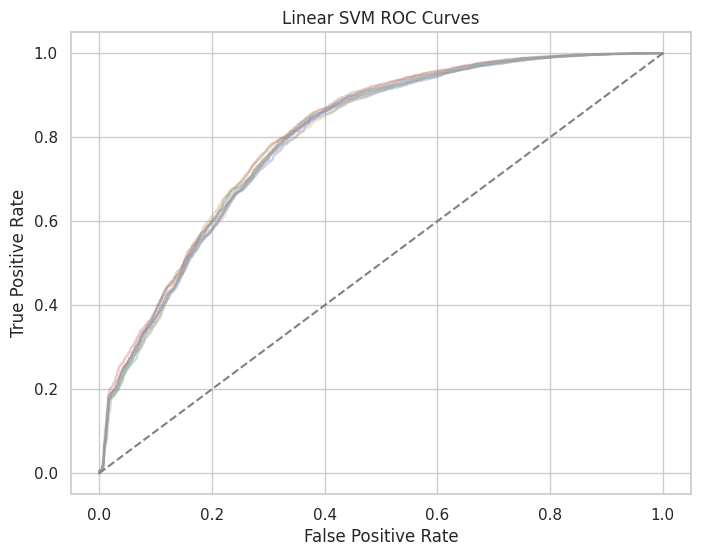

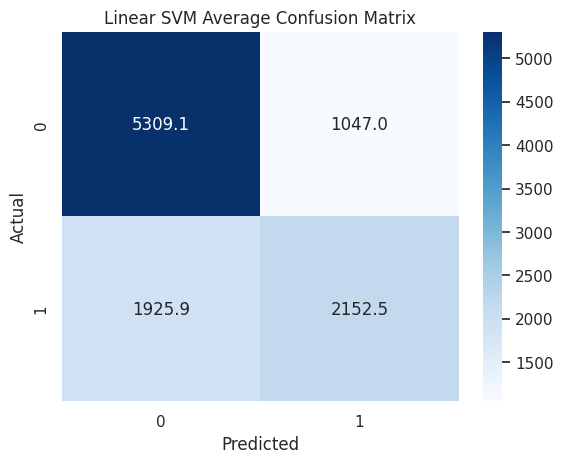


Evaluating Gradient Boosting...
Accuracy: 0.9903 ± 0.0009
F1 Score: 0.9877 ± 0.0011
Recall: 0.9977 ± 0.0006
Precision: 0.9779 ± 0.0022


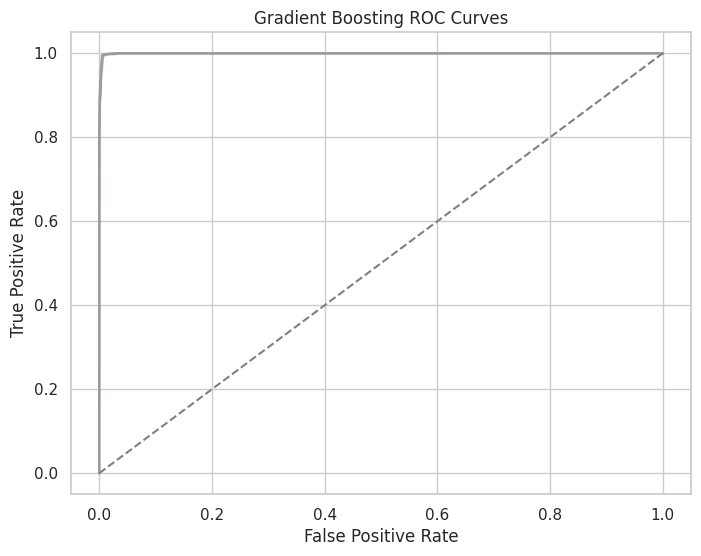

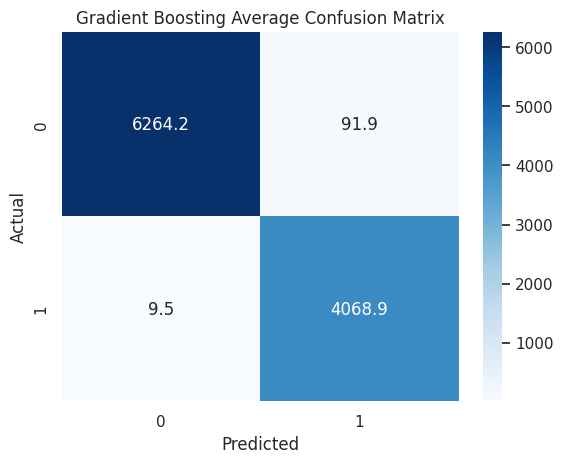


Evaluating Logistic Regression...
Accuracy: 0.7290 ± 0.0031
F1 Score: 0.6213 ± 0.0040
Recall: 0.5687 ± 0.0054
Precision: 0.6846 ± 0.0063


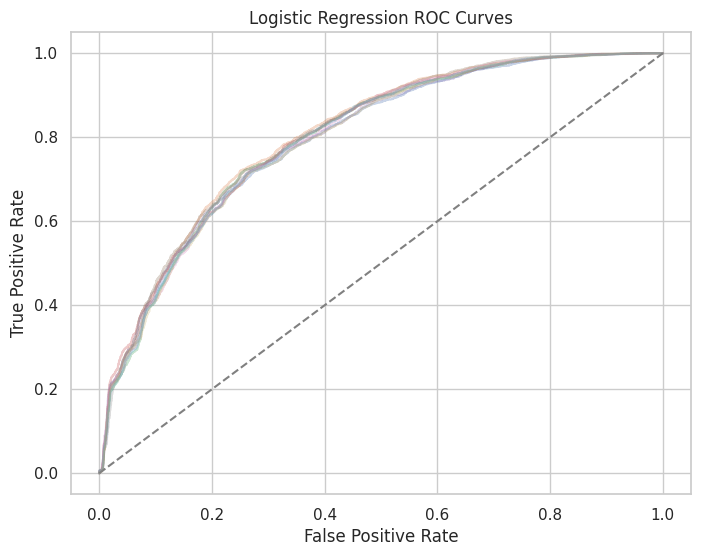

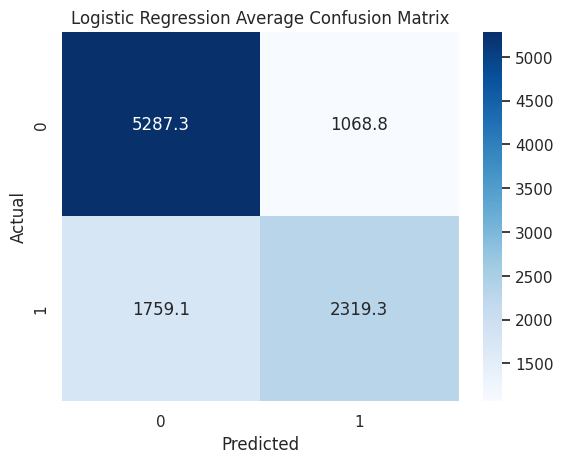

In [ ]:
# Her bir modeli değerlendir
test_results = []

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    metrics, roc_curves, confusion_matrices = custom_cross_val_roc(model, X_scaled, y)

    # Ortalama metrikler
    result = {"Model": name}
    for metric_name, values in metrics.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        result[f"{metric_name} (mean ± std)"] = f"{mean_val:.4f} ± {std_val:.4f}"
        print(f"{metric_name}: {mean_val:.4f} ± {std_val:.4f}")
    test_results.append(result)

    # ROC Eğrisi
    plt.figure(figsize=(8, 6))
    for fpr, tpr in roc_curves:
        plt.plot(fpr, tpr, alpha=0.3)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{name} ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Ortalama Confusion Matrix
    mean_cm = np.mean(confusion_matrices, axis=0)
    sns.heatmap(mean_cm, annot=True, fmt=".1f", cmap="Blues")
    plt.title(f'{name} Average Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
from tabulate import tabulate

# Test sonuçlarını tabloya dök
test_results_df = pd.DataFrame(test_results)
table = tabulate(test_results_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒═════════════════════╤═════════════════════════╤═════════════════════════╤═══════════════════════╤══════════════════════════╕
│ Model               │ Accuracy (mean ± std)   │ F1 Score (mean ± std)   │ Recall (mean ± std)   │ Precision (mean ± std)   │
╞═════════════════════╪═════════════════════════╪═════════════════════════╪═══════════════════════╪══════════════════════════╡
│ KNN                 │ 0.9808 ± 0.0014         │ 0.9754 ± 0.0018         │ 0.9738 ± 0.0020       │ 0.9770 ± 0.0026          │
├─────────────────────┼─────────────────────────┼─────────────────────────┼───────────────────────┼──────────────────────────┤
│ Naive Bayes         │ 0.6196 ± 0.0034         │ 0.5317 ± 0.0043         │ 0.5525 ± 0.0062       │ 0.5125 ± 0.0040          │
├─────────────────────┼─────────────────────────┼─────────────────────────┼───────────────────────┼──────────────────────────┤
│ Linear SVM          │ 0.7151 ± 0.0027         │ 0.5915 ± 0.0047         │ 0.5278 ± 0.0071       │ 0.6728 ± 0.